## Install YOLOv8 and Setup all the dependencies

In [11]:
# Pip install method (recommended)
%pip install ultralytics==8.2.103 -q
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.2.103 🚀 Python-3.10.11 torch-2.5.1 CPU (Apple M2)
Setup complete ✅ (8 CPUs, 8.0 GB RAM, 202.2/228.3 GB disk)


## Train the YOLO v8 with the datasets from the Roboflow (570 annotated images)

In [14]:
!yolo task=detect mode=train model="../model/yolov8n.pt" data="../data/roboflow_datasets/data.yaml" epochs=25 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.11 torch-2.5.1 CPU (Apple M2)
engine/trainer: task=detect, mode=train, model=../model/yolov8n.pt, data=../data/roboflow_datasets/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

## Validate Trained Model

In [17]:
!yolo task=detect mode=val model="../runs/detect/train/weights/best.pt" data="../data/roboflow_datasets/data.yaml"

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/traffic-analysis-10/valid/labels.cache... 114 images, 4 backgrounds, 0 corrupt: 100% 114/114 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 8/8 [00:15<00:00,  1.96s/it]
                   all        114       3891      0.669       0.64      0.656      0.304
vehicle-causeway-johor         59       1506       0.59      0.427      0.465      0.173
vehicle-causeway-singapore         63       1479      0.739      0.676       0.72       0.33
vehicle-secondlink-johor         44        513      0.655      0.707      0.698      0.329
vehicle-secondlink-singapore         41        393      0.694      0.751      0.742      0.382
Speed: 0.4ms preprocess, 15.6ms inference, 0.0ms loss, 8.3ms postprocess per image
Results saved 

## Inference with Trained Model on the selected dataset (12 october 2024 hourly)

In [5]:
import pandas as pd
from ultralytics import YOLO
import os

# Load the trained model
model = YOLO("../model/BestModel-570.pt")

# Run predictions on the specified directory and capture the results
results = model.predict(source="../data/12_oct_hourly", conf=0.25)

# Prepare data for CSV
bounding_boxes_data = []

# Loop through results
for result in results:
    image_name = os.path.basename(result.path)  # get image filename
    for box in result.boxes:
        bbox = box.xyxy[0].tolist()  # get bounding box coordinates (x1, y1, x2, y2)
        score = box.conf.tolist()    # get confidence score
        class_id = int(box.cls[0])   # get class id as an integer

        # Append the data in TensorFlow-like format
        bounding_boxes_data.append([
            image_name, class_id, score, bbox[0], bbox[1], bbox[2], bbox[3]
        ])

# Create a DataFrame
columns = ['image_name', 'class_id', 'confidence', 'x_min', 'y_min', 'x_max', 'y_max']
df = pd.DataFrame(bounding_boxes_data, columns=columns)

# Save to CSV
output_csv_path = "bounding_boxes_12_oct_hourly.csv"
df.to_csv(output_csv_path, index=False)

print(f"Bounding boxes saved to {output_csv_path}")



image 1/72 /Users/babono/Development/ind5003-traffic-analysis/notebooks/../data/12_oct_hourly/2701_2024-10-12_03-49-34.jpg: 480x800 2 vehicle-causeway-johors, 7 vehicle-causeway-singapores, 130.6ms
image 2/72 /Users/babono/Development/ind5003-traffic-analysis/notebooks/../data/12_oct_hourly/2701_2024-10-12_04-49-12.jpg: 480x800 3 vehicle-causeway-johors, 11 vehicle-causeway-singapores, 113.2ms
image 3/72 /Users/babono/Development/ind5003-traffic-analysis/notebooks/../data/12_oct_hourly/2701_2024-10-12_06-49-12.jpg: 480x800 11 vehicle-causeway-johors, 14 vehicle-causeway-singapores, 114.1ms
image 4/72 /Users/babono/Development/ind5003-traffic-analysis/notebooks/../data/12_oct_hourly/2701_2024-10-12_08-49-14.jpg: 480x800 55 vehicle-causeway-johors, 65 vehicle-causeway-singapores, 113.4ms
image 5/72 /Users/babono/Development/ind5003-traffic-analysis/notebooks/../data/12_oct_hourly/2701_2024-10-12_10-49-11.jpg: 480x800 62 vehicle-causeway-johors, 62 vehicle-causeway-singapores, 109.9ms
im

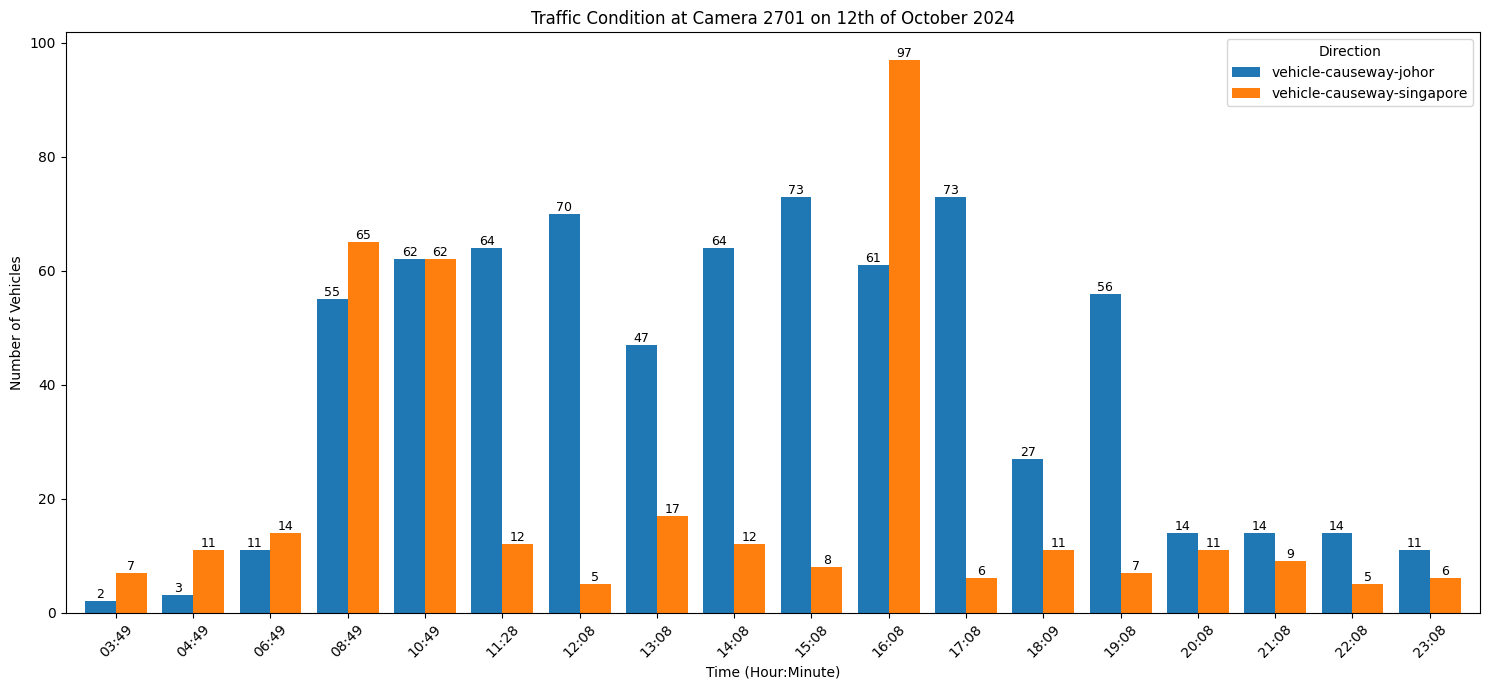

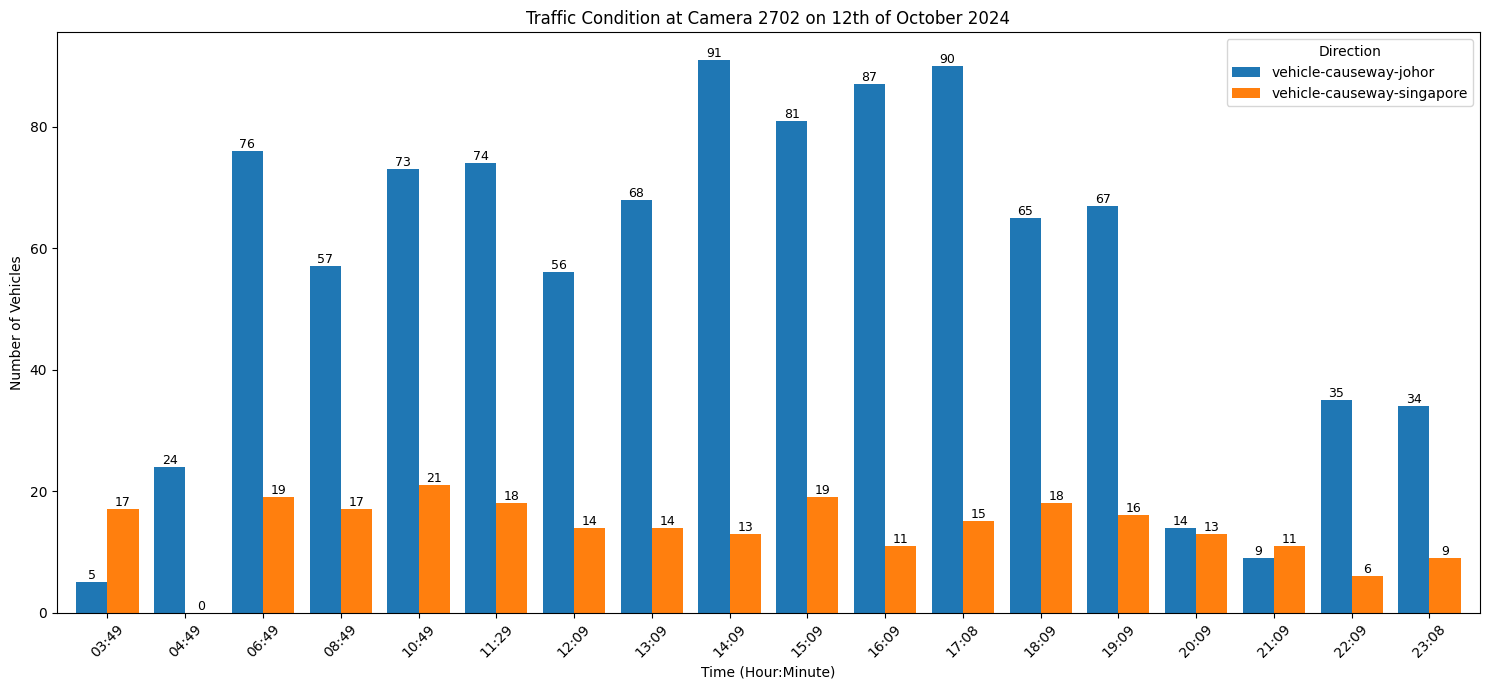

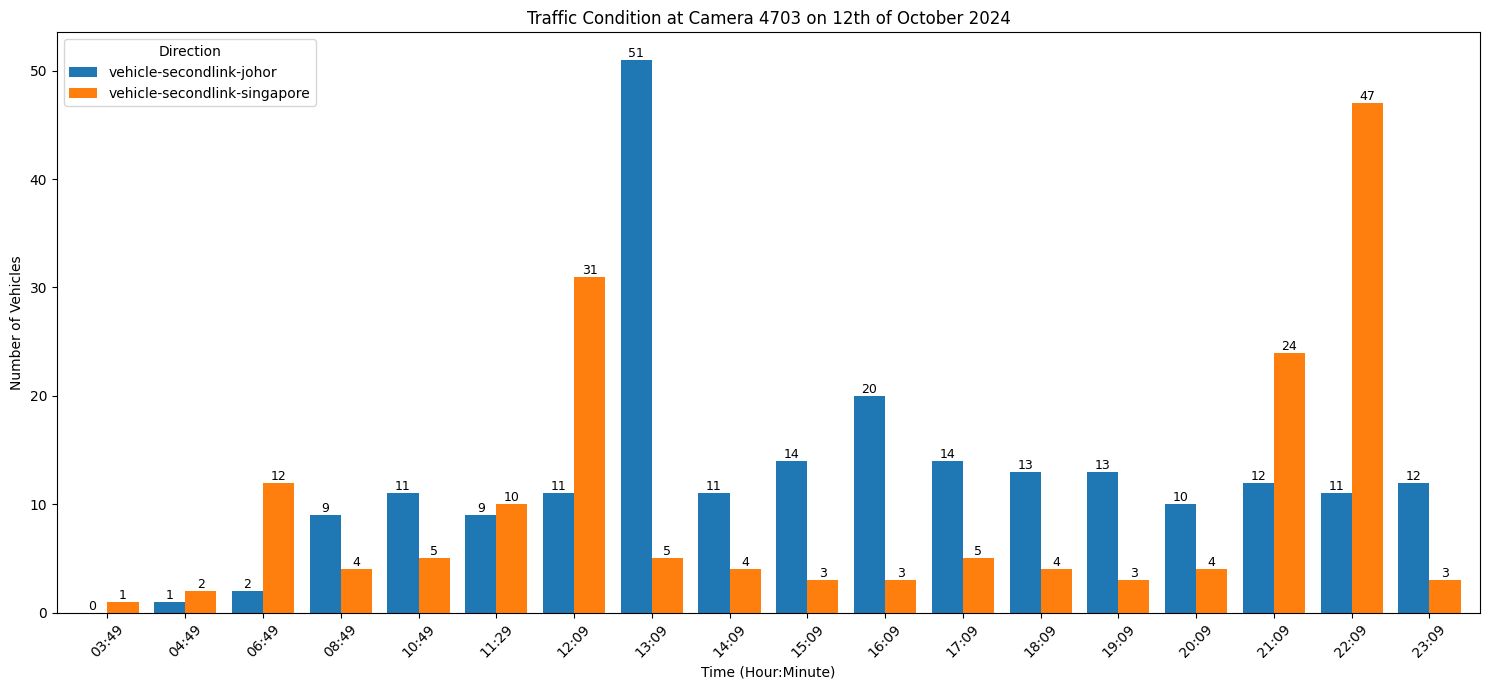

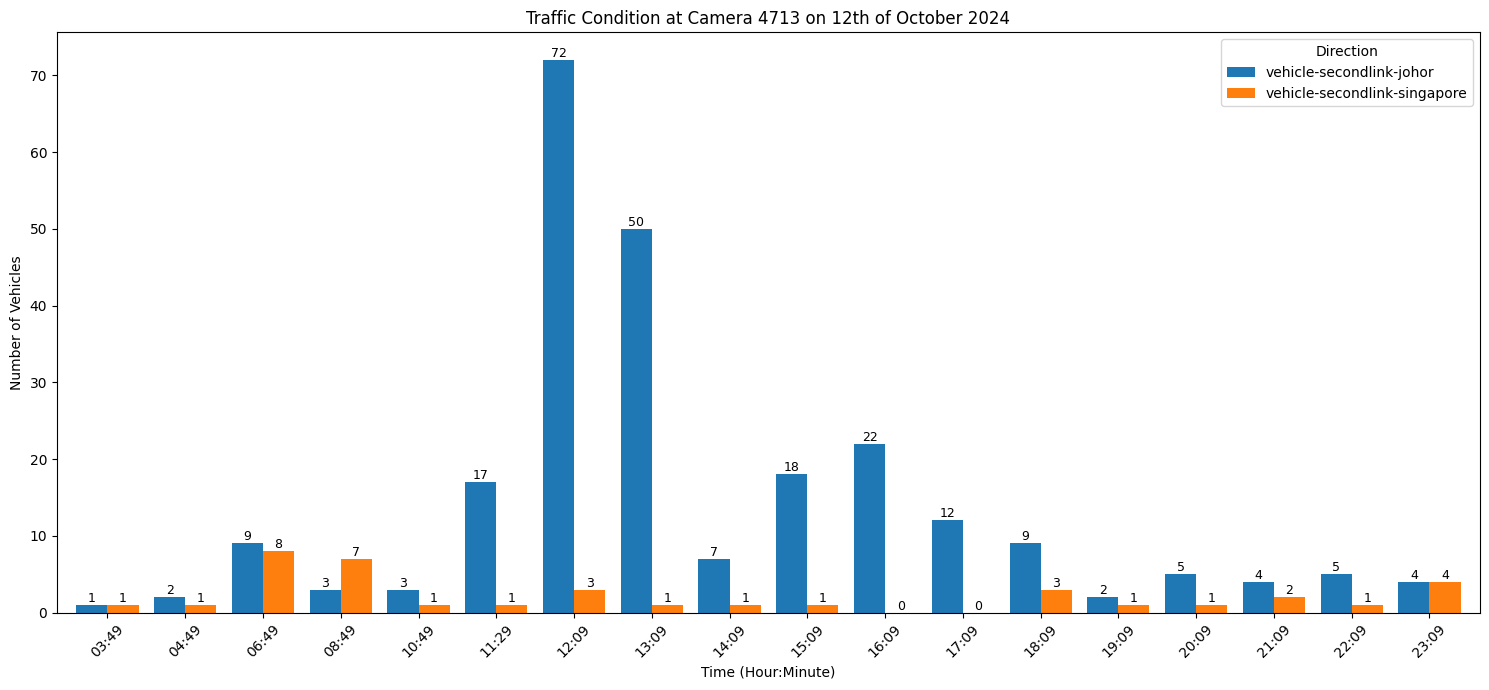

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a mapping of class IDs to class names
class_id_to_name = {
    0: "vehicle-causeway-johor",
    1: "vehicle-causeway-singapore",
    2: "vehicle-secondlink-johor",
    3: "vehicle-secondlink-singapore"
}

# Load the bounding boxes CSV
df = pd.read_csv("../bounding_boxes_based_on_hourly_interval.csv")

# Map class IDs to class names
df['class_name'] = df['class_id'].map(class_id_to_name)

# Extract the full timestamp from the image name
df['timestamp'] = pd.to_datetime(df['image_name'].str.extract(r'(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})')[0], format='%Y-%m-%d_%H-%M-%S')

# Extract the hour and minute for labeling purposes
df['hour_minute'] = df['timestamp'].dt.strftime('%H:%M')

# Extract the camera ID from the filename (first four digits)
df['camera_id'] = df['image_name'].str.extract(r'^(\d{4})')[0]

# Filter for the target date (12th of October)
target_date = pd.to_datetime("2024-10-12").date()
df = df[df['timestamp'].dt.date == target_date]

# Get unique camera IDs
camera_ids = df['camera_id'].unique()

# Plot data for each camera separately
for camera_id in camera_ids:
    camera_data = df[df['camera_id'] == camera_id]
    
    # Count the number of labels per timestamp for each class
    label_counts = camera_data.groupby(['hour_minute', 'class_name']).size().reset_index(name='count')
    
    # Pivot the data for plotting
    pivot_df = label_counts.pivot(index='hour_minute', columns='class_name', values='count').fillna(0)
    
    # Plot the grouped bar chart for this camera
    ax = pivot_df.plot(kind='bar', figsize=(15, 7), width=0.8)
    plt.title(f'Traffic Condition at Camera {camera_id} on 12th of October 2024')
    plt.xlabel('Time (Hour:Minute)')
    plt.ylabel('Number of Vehicles')
    plt.xticks(rotation=45)
    plt.legend(title='Direction')
    plt.tight_layout()
    
    # Annotate counts on top of each bar
    for p in ax.patches:
        ax.annotate(
            str(int(p.get_height())), 
            (p.get_x() + p.get_width() / 2, p.get_height()), 
            ha='center', va='bottom', fontsize=9
        )
    
    plt.show()
